In [1]:
from traj2sim import *
import math

In [2]:
from mpl_toolkits import mplot3d
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

def plot_traj(list_traj):
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    for i in range(len(list_traj)):
        xdata = list_traj[i][:,1]
        ydata = list_traj[i][:,2]
        zdata = list_traj[i][:,3]
        ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens')

Persistence intervals:
[(1, (0.9298093479708587, 3.872983346207417)), (0, (0.0, inf)), (0, (0.0, 0.9298093479708586)), (0, (0.0, 0.9298093479708579)), (0, (0.0, 0.9298093479708578)), (0, (0.0, 0.9298093479708577)), (0, (0.0, 0.9298093479708576)), (0, (0.0, 0.9298093479708573)), (0, (0.0, 0.9298093479708573)), (0, (0.0, 0.9298093479708572)), (0, (0.0, 0.9298093479708572)), (0, (0.0, 0.9298093479708572)), (0, (0.0, 0.929809347970857)), (0, (0.0, 0.9298093479708569)), (0, (0.0, 0.9298093479708568)), (0, (0.0, 0.9298093479708568))]


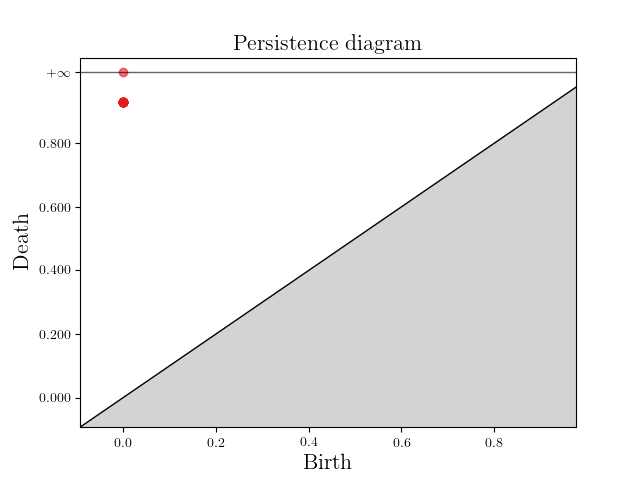

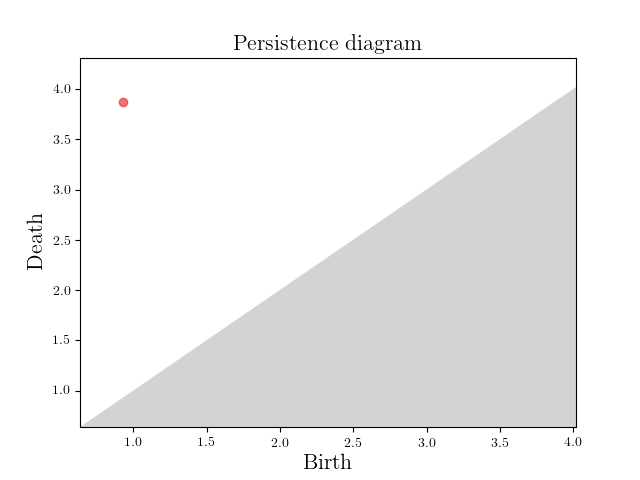

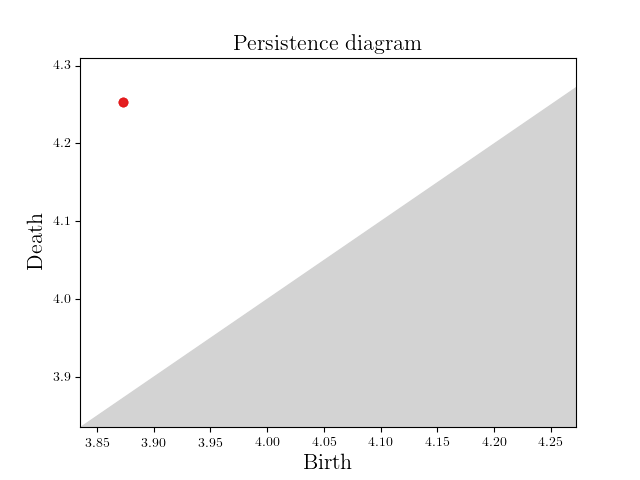

In [4]:
def sphere_point(theta, phi):
    return [math.sin(phi)*math.cos(theta), math.sin(phi)*math.sin(theta), -math.cos(phi)]

def great_circle(theta, length = 10, noise=False, sigma=0.05):
    traj = np.zeros((length,3))
    for i in range(0, length):
        traj[i][:] = sphere_point(theta, i*math.pi/length) 
        if noise == True:
            traj[i] = np.add(traj[i],sigma*np.random.randn(1,3))
    return traj

t2s = Traj2Sim()

list_traj = []
N=15
for i in range(N):
    list_traj.append(great_circle(2*i*math.pi/N, noise=False))
t2s.set_trajectories(list_traj)
t2s.dist = 'dtw'
t2s.compute_dist()
t2s.compute_sim(verbose=False)


print('Persistence intervals:')
print(t2s.simplex_tree.persistence(homology_coeff_field=2, min_persistence=0.5))
t2s.display_persistence()


In [3]:
def great_circle_with_time(theta, length=10, noise=False, sigma=0.05, time_i=0, time_f=10):
    traj = np.zeros((time_f-time_i,4))
    for i in range(0, time_f-time_i):
        traj[i][1:] = sphere_point(theta, (time_i+i)*math.pi/length)
        traj[i][0] = sphere_point(theta, (time_i+i)*math.pi/length)[2]
        if noise == True:
            traj[i][1:] = np.add(traj[i],sigma*np.random.randn(1,3))
    return traj

t2s = Traj2Sim()

traj1 = great_circle_with_time(2*math.pi*0.5, time_i=0, time_f=7)
traj2 = great_circle_with_time(2*math.pi*0.6, time_i=3, time_f=10)
print(traj1)
print(traj2)
print(t2s.custom_broken_dist(traj1, traj2))

[[-1.00000000e+00 -0.00000000e+00  0.00000000e+00 -1.00000000e+00]
 [-9.51056516e-01 -3.09016994e-01  3.78436673e-17 -9.51056516e-01]
 [-8.09016994e-01 -5.87785252e-01  7.19829328e-17 -8.09016994e-01]
 [-5.87785252e-01 -8.09016994e-01  9.90760073e-17 -5.87785252e-01]
 [-3.09016994e-01 -9.51056516e-01  1.16470832e-16 -3.09016994e-01]
 [-6.12323400e-17 -1.00000000e+00  1.22464680e-16 -6.12323400e-17]
 [ 3.09016994e-01 -9.51056516e-01  1.16470832e-16  3.09016994e-01]]
[[-5.87785252e-01 -6.54508497e-01 -4.75528258e-01 -5.87785252e-01]
 [-3.09016994e-01 -7.69420884e-01 -5.59016994e-01 -3.09016994e-01]
 [-6.12323400e-17 -8.09016994e-01 -5.87785252e-01 -6.12323400e-17]
 [ 3.09016994e-01 -7.69420884e-01 -5.59016994e-01  3.09016994e-01]
 [ 5.87785252e-01 -6.54508497e-01 -4.75528258e-01  5.87785252e-01]
 [ 8.09016994e-01 -4.75528258e-01 -3.45491503e-01  8.09016994e-01]
 [ 9.51056516e-01 -2.50000000e-01 -1.81635632e-01  9.51056516e-01]]
0.6486624715503674


Persistence intervals:
[(0, (0.0, inf))]


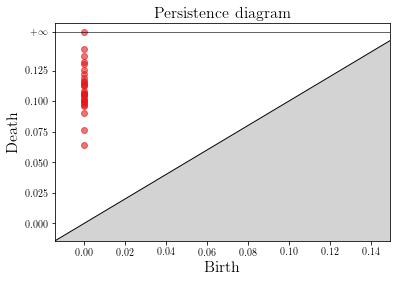

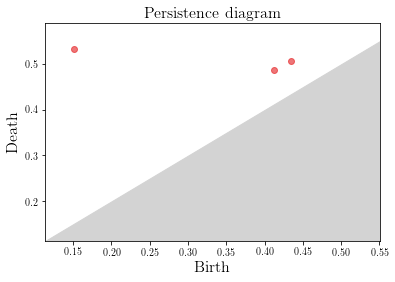

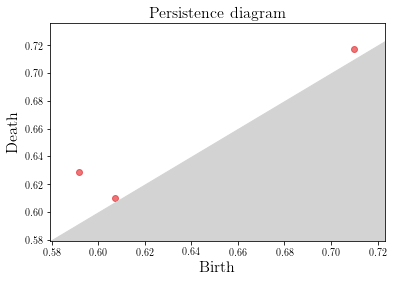

In [13]:
def great_circle_with_time(theta, length = 10, noise=False, sigma=0.05):
    traj = np.zeros((length,4))
    for i in range(0, length):
        traj[i][1:] = sphere_point(theta, i*math.pi/length)
        traj[i][0] = sphere_point(theta, i*math.pi/length)[2]
        if noise == True:
            traj[i] = np.add(traj[i],sigma*np.random.randn(1,4))
    return traj

t2s = Traj2Sim()

list_traj = []
N=30
for i in range(N):
    list_traj.append(great_circle_with_time(2*i*math.pi/N, noise=True))
t2s.set_trajectories(list_traj)
t2s.dist = 'custom'
t2s.compute_dist(verbose=False)
t2s.compute_sim(verbose=False)


print('Persistence intervals:')
print(t2s.simplex_tree.persistence(homology_coeff_field=2, min_persistence=0.5))
t2s.display_persistence()

Persistence intervals:
[(1, (0.18458322128565918, 0.8684934470099048)), (1, (0.1845832212856593, 0.8684934470099048)), (1, (0.1845832212856593, 0.8684934470099048)), (1, (0.1845832212856593, 0.8684934470099048)), (1, (0.1845832212856593, 0.8684934470099048)), (0, (0.0, inf))]


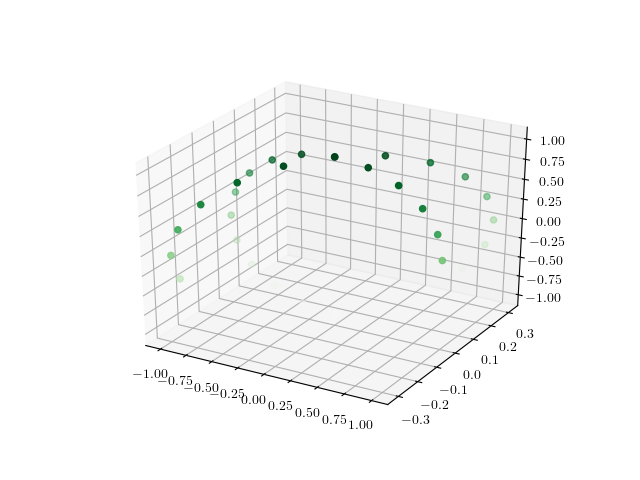

In [19]:
def great_circle_with_time(theta, length=10, noise=False, sigma=0.05, time_i=0, time_f=10):
    traj = np.zeros((time_f-time_i,4))
    for i in range(0, time_f-time_i):
        traj[i][1:] = sphere_point(theta, (time_i+i)*math.pi/length)
        traj[i][0] = sphere_point(theta, (time_i+i)*math.pi/length)[2]
        if noise == True:
            traj[i][1:] = np.add(traj[i],sigma*np.random.randn(1,3))
    return traj

t2s = Traj2Sim()

list_traj = []
N=20
for i in range(N):
    if i%2 == 0:
        list_traj.append(great_circle_with_time(2*i*math.pi/N, noise=False,time_i=0, time_f=int(0.8*N)))
    else:
        list_traj.append(great_circle_with_time(2*i*math.pi/N, noise=False,time_i=int(0.2*N), time_f=N-1))

plot_traj(list_traj[10:12])
t2s.set_trajectories(list_traj)
t2s.dist = 'custom'
t2s.compute_dist(verbose=False)
t2s.compute_sim(verbose=False)


print('Persistence intervals:')
print(t2s.simplex_tree.persistence(homology_coeff_field=2, min_persistence=0.5))
#t2s.display_persistence()